# Config

In [1]:
from config_manager import initialise_config

initialise_config(folder_name="my-simulation", verbose=1)


Folder C:\Github\reproducible-scientific-notebook-configurations\project-data\my-simulation already exists. No changes made.


In [2]:
from config_manager import load_configs, print_config

# Load the configuration (specify folder name and optional suffix)
loaded_config = load_configs(folder_name="my-simulation", config_suffix="v1") # default suffix is "v1"
print_config(loaded_config)

notebook: 
  version: v1
  name: my-simulation
  desc: Simulate and capture the results of ODE models in SBML format
exp: 
  model: lotka-volterra.xml
  simulation: 
    start: 0
    stop: 1000
    step: 100


In [ ]:
# from config_manager import clear_data_and_figure

# only use this if you want to remove previous data and figures (e.g. if you renamed some of the figure or data files and wants to remove 
# the old ones)
# clear_data_and_figure(loaded_config['notebook'], verbose=1)

Cleared data files for version v1 in C:\Github\reproducible-scientific-notebook-configurations\project-data\my-simulation\data
Cleared figure files for version v1 in C:\Github\reproducible-scientific-notebook-configurations\project-data\my-simulation\figures


# Notebook main

In [11]:
import roadrunner
import pandas as pd
from config_manager import save_data

# Get the model file path and simulation parameters from the loaded configuration
model_path = loaded_config['exp']['model']
sim_params = loaded_config['exp']['simulation']

# Load the SBML model using RoadRunner
rr = roadrunner.RoadRunner(model_path)

# Run a simulation using parameters from config
result = rr.simulate(
    start=sim_params['start'],
    end=sim_params['stop'],
    steps=sim_params['step']
)

# Display the simulation result
result_df = pd.DataFrame(result, columns=rr.timeCourseSelections)
save_data(
    notebook_config=loaded_config["notebook"],
    data=result_df,
    data_name="simulation_results_python",
    data_format="csv",
)

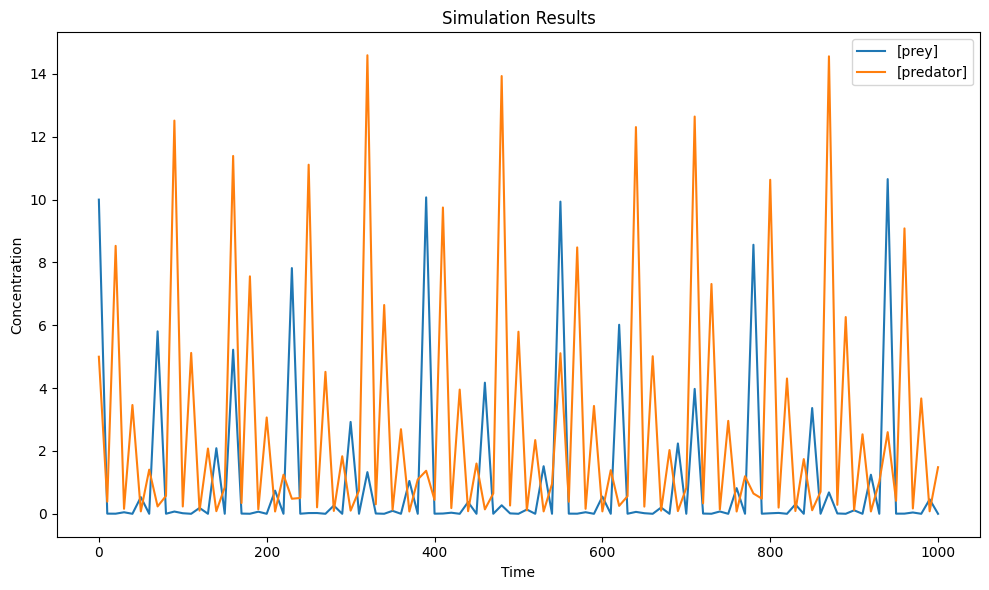

In [12]:
from config_manager import save_figure

import matplotlib.pyplot as plt

# Plot the simulation results
plt.figure(figsize=(10, 6))
for col in result_df.columns:
    if col != 'time':
        plt.plot(result_df['time'], result_df[col], label=col)
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Simulation Results')
plt.legend()
plt.tight_layout()

# Save the figure using config_manager
save_figure(
    notebook_config=loaded_config["notebook"],
    fig=plt.gcf(),
    fig_name="simulation_plot_python",
    fig_format="png"
)

plt.show()